# Reaction equilibrium: ideal gas mixture

**General equation:**

$$ K_a = \biggl(\frac{P}{P_{ref}\cdot(1+\delta \cdot \xi')}\biggr)^\delta \cdot \prod_j (y_{j0}+\nu_j\cdot\xi')^{\nu_j} $$

**Example:** $ I + B \rightleftharpoons P$

$ P = 2.5\ atm $

$ P_{ref} = 1\ atm $

$ y_{0,I}=y_{0,B}=0.5 $

$ T = 400 \ K $

$ \Delta G_{rxn,400 \ K}^\circ = -3.72 \ kcal \ mol^{-1} $


$$ K_a = \biggl(\frac{2.5}{(1- \xi')}\biggr)^{-1} \cdot \frac{\xi'}{(0.5-\xi')^2} $$

In [68]:
########## Reaction equilibrium example

### Import packages
import numpy as np
import scipy.optimize as opt

### Initial calculations
dGrxn = -3.72*1000 # cal / mol
R     = 1.987 # cal / mol
T     = 400 # K

Ka = np.exp(-dGrxn/R/T)

### Define guess values
xip_g = [0.45] # xi' guess; likely small near 0-1

### Define set of equations
def rxn_equil(U):
    
    ### Re-declare independent variables
    xip = U
    
    ### Define equations
    setzero = np.zeros(len(U))
    setzero[0] = Ka - (2.5/(1-xip))**(-1)*xip/(0.5-xip)**2
    
    ### Reorganize output to fit required dimensions 
    setzero = np.array(setzero).tolist()
    
    return setzero

### Use solver
xip = opt.fsolve(rxn_equil,xip_g)   # Enter function vollowed by variable guesses

### Verify that solution was achieved
zerocheck = equilibrium(xip)
print('Zerocheck: ',zerocheck,'\n')

### Calculate compositions

y_I = (0.5-xip)/(1-xip)
y_B = (0.5-xip)/(1-xip)
y_P = (xip)/(1-xip)

X_I = 1 - y_I/0.5*(1-xip)

print('xi prime =',xip)
print('y_I =',y_I)
print('y_B =',y_B)
print('y_P =',y_P)
print('X_I =',X_I)

Zerocheck:  [1.515118697170692e-09] 

xi prime = [0.4696013]
y_I = [0.05731292]
y_B = [0.05731292]
y_P = [0.88537416]
X_I = [0.9392026]


C:\Users\neaga\AppData\Local\Temp\ipykernel_15532\2748515222.py:22: RuntimeWarning: divide by zero encountered in log
  T_array[i] = dGrxn/(-R*np.log(Ka))


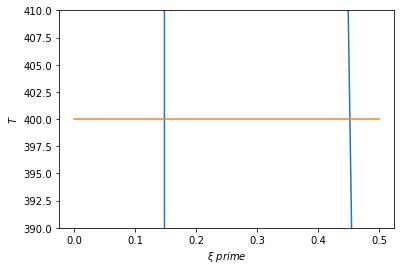

In [85]:
###### K vs xip
import numpy as np
import matplotlib.pyplot as plt

### Generate array of xi_p values
xip_array = np.linspace(0,0.499,101) # 101 evenly-spaced numbers

### Constants
P = 1 # atm
y_0I = 0.5
y_0B = 0.5

### Generate empty array of Ka values
Qa_array = np.zeros(len(xip_array))
T_array = np.zeros(len(xip_array))

### Iteratively calvulate Ka for each xip

for i,val in enumerate(Ka_array): 
    Qa_array[i] = (P/(1-xip_array[i]))**(-1)*xip_array[i]/(y_0I-xip_array[i])/(y_0B-xip_array[i])
    Ka = Qa_array[i]
    T_array[i] = dGrxn/(-R*np.log(Ka))
    
### Actual reaction T
T_actual = 400 # K
T_actual_array = T_actual * np.ones(len(T_array))
    
### Plot results
plt.plot(xip_array,T_array)
plt.plot(xip_array,T_actual_array)
plt.ylim([T_actual-10,T_actual+10])
plt.xlabel(r'$\xi \ prime$')
plt.ylabel(r'$T$')
plt.show()


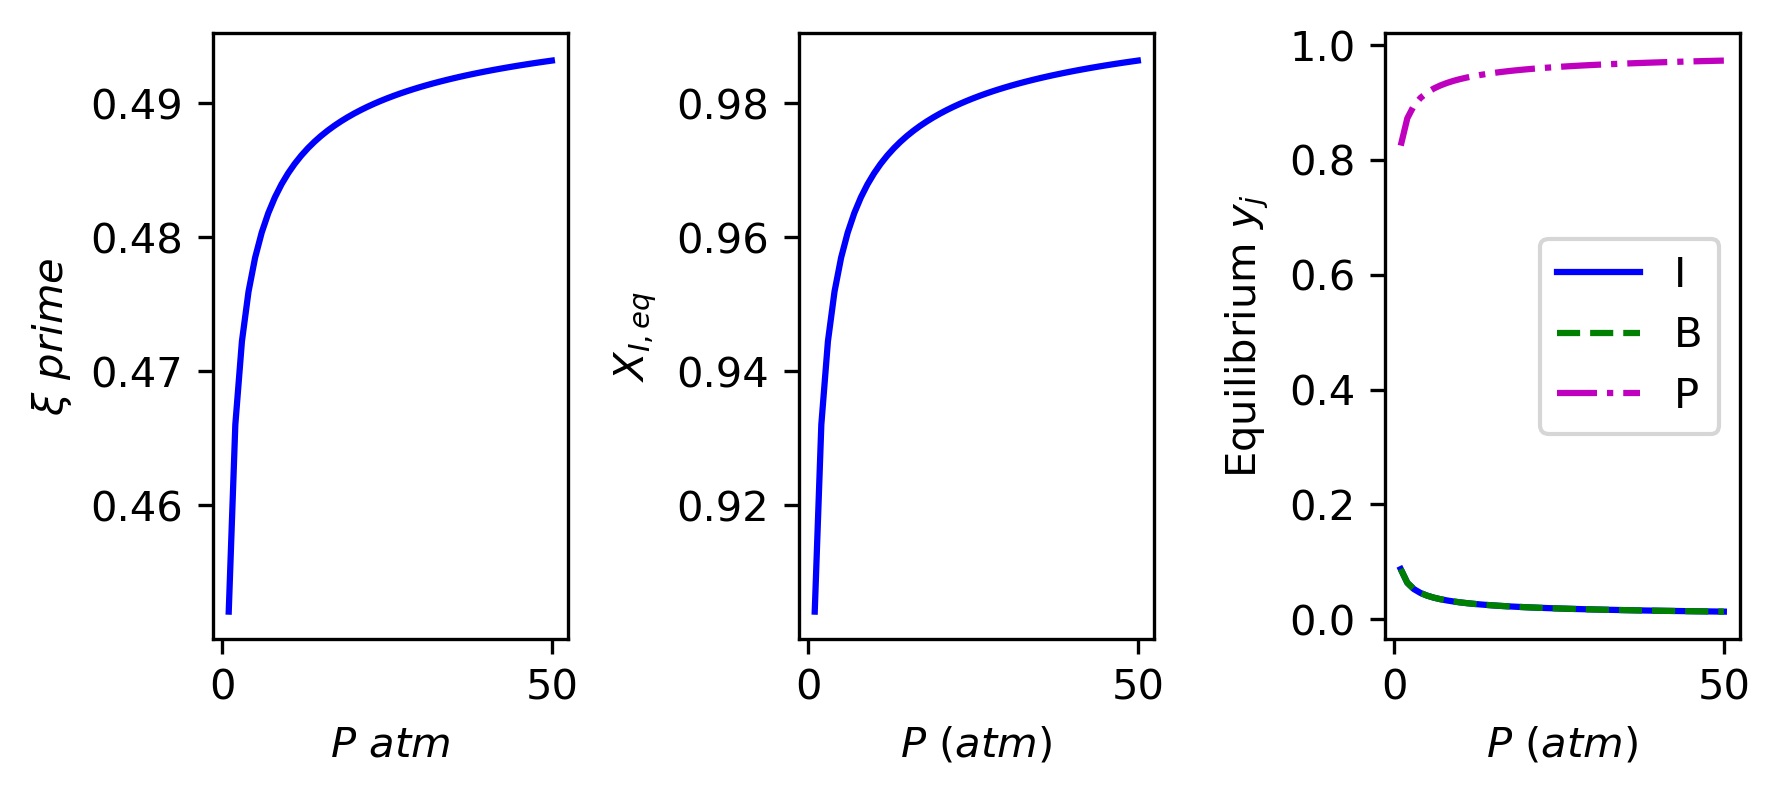

In [101]:
########## Reaction equilibrium example

### Import packages
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

### Conditions
P = 2.5 # atm
y_I0 = 0.5
y_B0 = 0.5
T     = 400 # K

### Thermodynamics
dGrxn = -3.72*1000 # cal / mol ; assume not a function of T ONLY here for simplicity
R     = 1.987 # cal / mol

### Define set of equations
def rxn_equil_iteration(U):
    
    ### Re-declare independent variables
    xip = U
    
    ### Calculations
    Ka = np.exp(-dGrxn/R/T)
    
    ### Define equations
    setzero = np.zeros(len(U))
    setzero[0] = Ka - (P/(1-xip))**(-1)*xip/(y_0I-xip)/(y_0B-xip)
    
    ### Reorganize output to fit required dimensions 
    setzero = np.array(setzero).tolist()
    
    return setzero

### Choose parameter to iterate over and create array of values
P_array = np.linspace(1,50,50) # atm

### Populate zero vector of xip
xip_array = np.zeros(len(P_array))

### Initial guess value for xip
xip_g = 0.45

### Iteratively guess xip, solve, update guess

for i,val in enumerate(P_array):
    P = P_array[i]
    xip_array[i] = opt.fsolve(rxn_equil_iteration,xip_g)
    xip_g = xip_array[i]

### Calculations
y_I_array = (0.5-xip_array)/(1-xip_array)
y_B_array = (0.5-xip_array)/(1-xip_array)
y_P_array = (xip_array)/(1-xip_array)

X_I_array = 1 - y_I/0.5*(1-xip_array)

### Plot via subplots
fig = plt.figure(figsize=(6,2.75),dpi=300)
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

ax1.plot(P_array,xip_array,'b')
ax1.set_xlabel(r'$P \ atm$')
ax1.set_ylabel(r'$\xi \ prime$')

ax2.plot(P_array,X_I_array,'b')
ax2.set_xlabel(r'$P \ (atm)$')
ax2.set_ylabel(r'$X_{I,eq}$')

ax3.plot(P_array,y_I_array,'b')
ax3.plot(P_array,y_B_array,'--g')
ax3.plot(P_array,y_P_array,'-.m')
ax3.legend(['I','B','P'])
ax3.set_xlabel(r'$P \ (atm)$')
ax3.set_ylabel(r'Equilibrium $y_j$')

fig.tight_layout()
plt.show()

#print(xip_array)